In [1]:
# > w1 = 2*pi*0.008; x1 = 0.35;
# > w2 = 2*pi*0.04;  x2 = 0.5;
# > w3 = 2*pi*0.05;  x3 = 0.5;
# >
# > % Slope of +3 from w1
# > wH = 0.008*(s^2/w1^2 + 2*x1/w1*s + 1)*(s/w1 + 1);
# > % Little bump from w2 to w3
# > wH = wH*(s^2/w2^2 + 2*x2/w2*s + 1)/(s^2/w3^2 + 2*x3/w3*s + 1);
# > % No Slope at high frequencies
# > wH = wH/(s^2/w3^2 + 2*x3/w3*s + 1)/(s/w3 + 1);
# > % Little bump between w2 and w3
# > w0 = 2*pi*0.045; xi = 0.1; A = 2; n = 1;
# > wH = wH*((s^2 + 2*w0*xi*A^(1/n)*s + w0^2)/(s^2 + 2*w0*xi*s + w0^2))^n;
# >
# > wH = 1/wH;
# > wH = minreal(ss(wH));
# >
# > n = 20; Rp = 1; Wp = 2*pi*0.102;
# > [b,a] = cheby1(n, Rp, Wp, 'high', 's');
# > wL = 0.04*tf(a, b);
# >
# > wL = 1/wL;
# > wL = minreal(ss(wL));

In [2]:
import numpy as np
from numpy import pi
from control import *
import matplotlib.pyplot as plt
from scipy.signal import cheby1

In [3]:
?cheby1

In [4]:
w1 = 2*pi*0.008; x1 = 0.35;
w2 = 2*pi*0.03;  x2 = 0.5;
w3 = 2*pi*0.04;  x3 = 0.5;
# wH = 0.008*(s**2/w1**2 + 2*x1/w1*s + 1)*(s/w1 + 1);
wH = 0.012*tf([1/w1**2, 2*x1/w1, 1], [1]) * tf([1/w1, 1],[1])

# wH = wH*(s^2/w2^2 + 2*x2/w2*s + 1)/(s^2/w3^2 + 2*x3/w3*s + 1);
wH *= tf([1/w2**2, 2*x2/w2, 1], [1/w2**2, 2*x2/w2, 1])

# wH = wH/(s**2/w3**2 + 2*x3/w3*s + 1)/(s/w3 + 1);
wH *= tf([1], [1/w3**2, 2*x3/w3, 1]) * tf([1], [1/w3, 1])

w0 = 2*pi*0.035; xi = 0.1; A = 2; n = 1;
# wH = wH*((s**2 + 2*w0*xi*A**(1/n)*s + w0**2)/(s**2 + 2*w0*xi*s + w0**2))**n;
wH *= tf([1, 2*w0*xi*A**(1/n), w0**2],[1, 2*w0*xi, w0**2])**n

wH = 1/wH;
# wH=wH.minreal()
# > n = 20; Rp = 1; Wp = 2*pi*0.102;
# > [b,a] = cheby1(n, Rp, Wp, 'high', 's');
n = 20; Rp = 1; Wp = 2*pi*0.102;
b, a = cheby1(n, Rp, Wp, 'high', analog= True);
wL = tf(a, b)*tf([0.25],[1])
wL = 1/wL
# wL=wL.minreal()

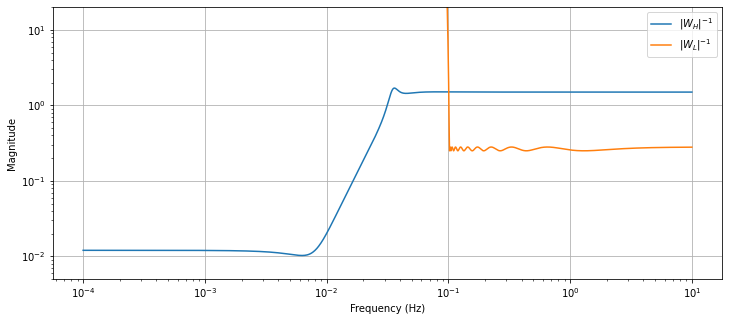

In [5]:
f = np.linspace(1e-4, 10 ,100000)
plt.figure(figsize=[12,5])
plt.loglog(f, abs(1/wH.horner(2*np.pi*1j*f)[0][0]), label='$|W_H|^{-1}$')
plt.loglog(f, abs(1/wL.horner(2*np.pi*1j*f)[0][0]), label='$|W_L|^{-1}$')
plt.ylim(5e-3, 2e1)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.legend(loc=0)
# abs(wH.horner(2*np.pi*1j*f)[0][0])[-1]

In [6]:
P=[[tf([0],[1]), wL],[wH, -wH],[tf([1],[1]),tf([0],[1])]]
# tf(P)
aug_P_num = list(np.zeros_like(P))
aug_P_den = list(np.zeros_like(P))
for i in range(len(P)):
    for j in range(len(P[i])):
#         print(P[i][j])
        aug_P_num[i][j] = list(P[i][j].num[0][0])
        aug_P_den[i][j] = list(P[i][j].den[0][0])
    aug_P_num[i]=list(aug_P_num[i])
    aug_P_den[i]=list(aug_P_den[i])
aug_P=tf(aug_P_num, aug_P_den)
# plt.loglog(f, abs(aug_P.horner(2*pi*1j*f)[0][0]))
# plt.loglog(f, abs(wL.horner(2*pi*1j*f)[0][0]))
# aug_P.pole
# list(aug_P_num)
# wL.num[0][0]
# aug_P_num[0]
# K, CL, gam, rcond=hinfsyn(ss(aug_P), 1, 1)
K=h2syn(ss(aug_P), 1, 1)

NameError: name 'gam' is not defined

In [8]:
HH.zero()

NameError: name 'HH' is not defined

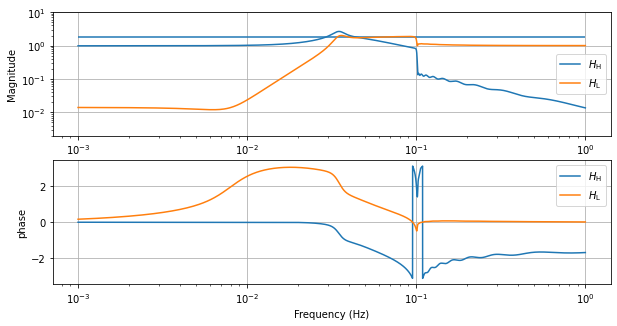

In [9]:
f = np.linspace(1e-3, 1 ,10000)

HH=ss2tf(K)
HL=1-HH
plt.figure(figsize=[10,5])
plt.subplot(211)
plt.loglog(f, abs(HH.horner(2*np.pi*1j*f)[0][0]), label='$H_\mathrm{H}$')
plt.loglog(f, abs(HL.horner(2*np.pi*1j*f)[0][0]), label='$H_\mathrm{L}$')
plt.hlines(1.8, min(f), max(f))
plt.ylim(2e-3, 10e0)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.legend(loc=0)
plt.subplot(212)
# plt.figure(figsize=[12,5])
plt.semilogx(f, np.angle(HH.horner(2*np.pi*1j*f)[0][0]), label='$H_\mathrm{H}$')
plt.semilogx(f, np.angle(HL.horner(2*np.pi*1j*f)[0][0]), label='$H_\mathrm{L}$')
plt.ylabel('phase')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.legend(loc=0)

In [ ]:
from kontrol import tfmatrix2tf
from control import h2syn, tf2ss, tf, hinfsyn
def h2complementary(n1, n2):
    p = [[tf([0],[1]), n2, tf([1],[1])],
         [n1, -n2, tf([0],[1])]]
#     p = [[n1, -n1],
#          [tf([0],[1]), n2],
#          [tf([1],[1]), tf([0],[1])]]
    p = tfmatrix2tf(p)
    k1 = h2syn(ss(p), 1, 1)
#     k1,_,_ = hinfsyn(tf2ss(p), nmeas=1, ncon=1)
    return(k1)

In [ ]:
?h2syn

In [ ]:
import numpy as np
from numpy import pi
omegac = 100*2*pi; G0 = 1e-5; Ginf = 1e-4;
# N1 = (Ginf*s/omegac + G0)/(s/omegac + 1)/(1 + s/2/pi/100);
n1 = tf([Ginf/omegac, G0],[1/omegac, 1])*tf([1], [1/2/np.pi/100, 1])
omegac = 1*2*pi; G0 = 1e-3; Ginf = 1e-8;
# N2 = ((sqrt(Ginf)*s/omegac + sqrt(G0))/(s/omegac + 1))^2/(1 + s/2/pi/4000)^2;
n2 = tf([np.sqrt(Ginf)/omegac, np.sqrt(G0)], [1/omegac, 1])**2 * tf([1], [1/2/np.pi/4000, 1])**2

In [ ]:
# n1*=tf([1/(2*np.pi*1e4), 1],[1])
n3=n1*tf([1/(2*np.pi*1e4), 1],[1])

In [ ]:
f = np.linspace(1e-1, 1e3, 10000)
import matplotlib.pyplot as plt
plt.loglog(f, abs(n1.horner(2*np.pi*1j*f)[0][0]))
plt.loglog(f, abs(n3.horner(2*np.pi*1j*f)[0][0]),'--',label='modified')
plt.loglog(f, abs(n2.horner(2*np.pi*1j*f)[0][0]))
plt.legend(loc=0)
plt.grid()
plt.title('noises')

In [ ]:
k1=h2complementary(n3, n2)
k1=tf(k1)
k1

In [ ]:
k1.zero()

In [ ]:
k2.zero()

In [ ]:
k2=1-k1
plt.loglog(f, abs(k1.horner(2*np.pi*1j*f)[0][0]))
plt.loglog(f, abs(k2.horner(2*np.pi*1j*f)[0][0]))
plt.legend(loc=0)
plt.grid()
plt.title('complementary filters')

In [ ]:
from kontrol import quad_sum

In [ ]:
plt.loglog(f, abs(n1.horner(2*np.pi*1j*f)[0][0]))
plt.loglog(f, abs(n2.horner(2*np.pi*1j*f)[0][0]))
plt.loglog(f, quad_sum(abs(n1.horner(2*np.pi*1j*f)[0][0])*abs(k1.horner(2*np.pi*1j*f)[0][0]),
                      abs(k2.horner(2*np.pi*1j*f)[0][0])*abs(n2.horner(2*np.pi*1j*f)[0][0])), label='Quadrature sum of filtered noises')
